# Importing Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [3]:
# This code reads a CSV file named 'kanpur.csv' into a pandas DataFrame called 'weather_df'.
# The column 'date_time' in the CSV file is parsed as a date and set as the index column of the DataFrame.
weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')

# This code displays the first 5 rows of the DataFrame to verify that the CSV file was properly loaded.
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


# Checking columns in our dataframe

In [4]:
# This code retrieves the column names of a pandas DataFrame called 'weather_df'.
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

## Now shape

In [5]:
#This code retrieves the dimensions of the pandas DataFrame weather_df. The output of this code is a tuple with two elements.
#The first element is the number of rows in the DataFrame and the second element is the number of columns in the DataFrame.
weather_df.shape

(96432, 24)

In [6]:
# This code generates descriptive statistics of a pandas DataFrame called 'weather_df'.
weather_df.describe()

# This code generates descriptive statistics of the pandas DataFrame weather_df. The describe() method calculates various summary statistics, including count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column in the DataFrame. This is useful for quickly getting a sense of the range and distribution of values in the DataFrame.

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


# Checking is there any null values in dataset

In [7]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

# Data Visualization

<AxesSubplot:>

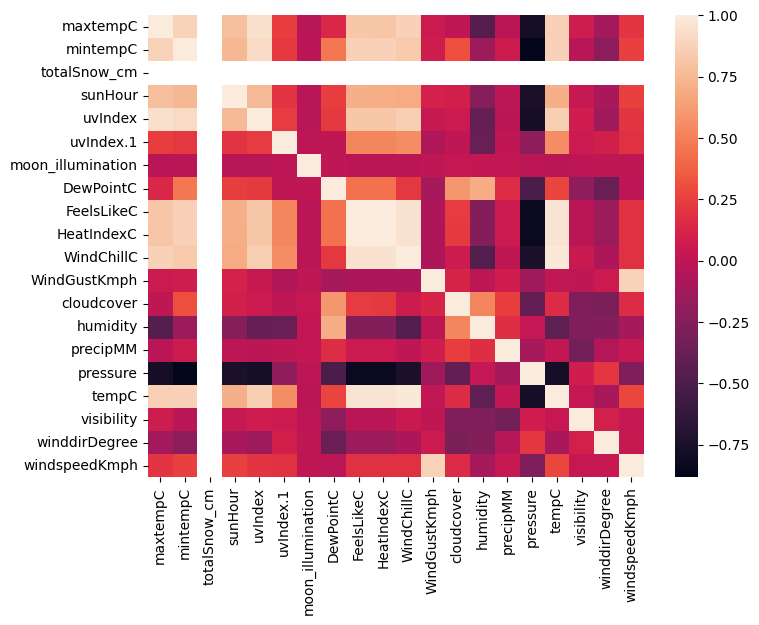

In [8]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(weather_df.corr(), ax=axes)

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [9]:
# This code selects a subset of numerical columns from a pandas DataFrame called 'weather_df' and creates a new DataFrame called 'weather_df_num'.
# The 'loc' method is used to select all rows and only the columns 'maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour', 'HeatIndexC', 'precipMM', 'pressure', and 'windspeedKmph'.
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]

# This code displays the first 5 rows of the new DataFrame 'weather_df_num' to verify that only the selected columns were included.
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


# Shape of new dataframe

In [10]:
weather_df_num.shape

(96432, 10)

# Columns in new dataframe

In [11]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

## Ploting all the column values

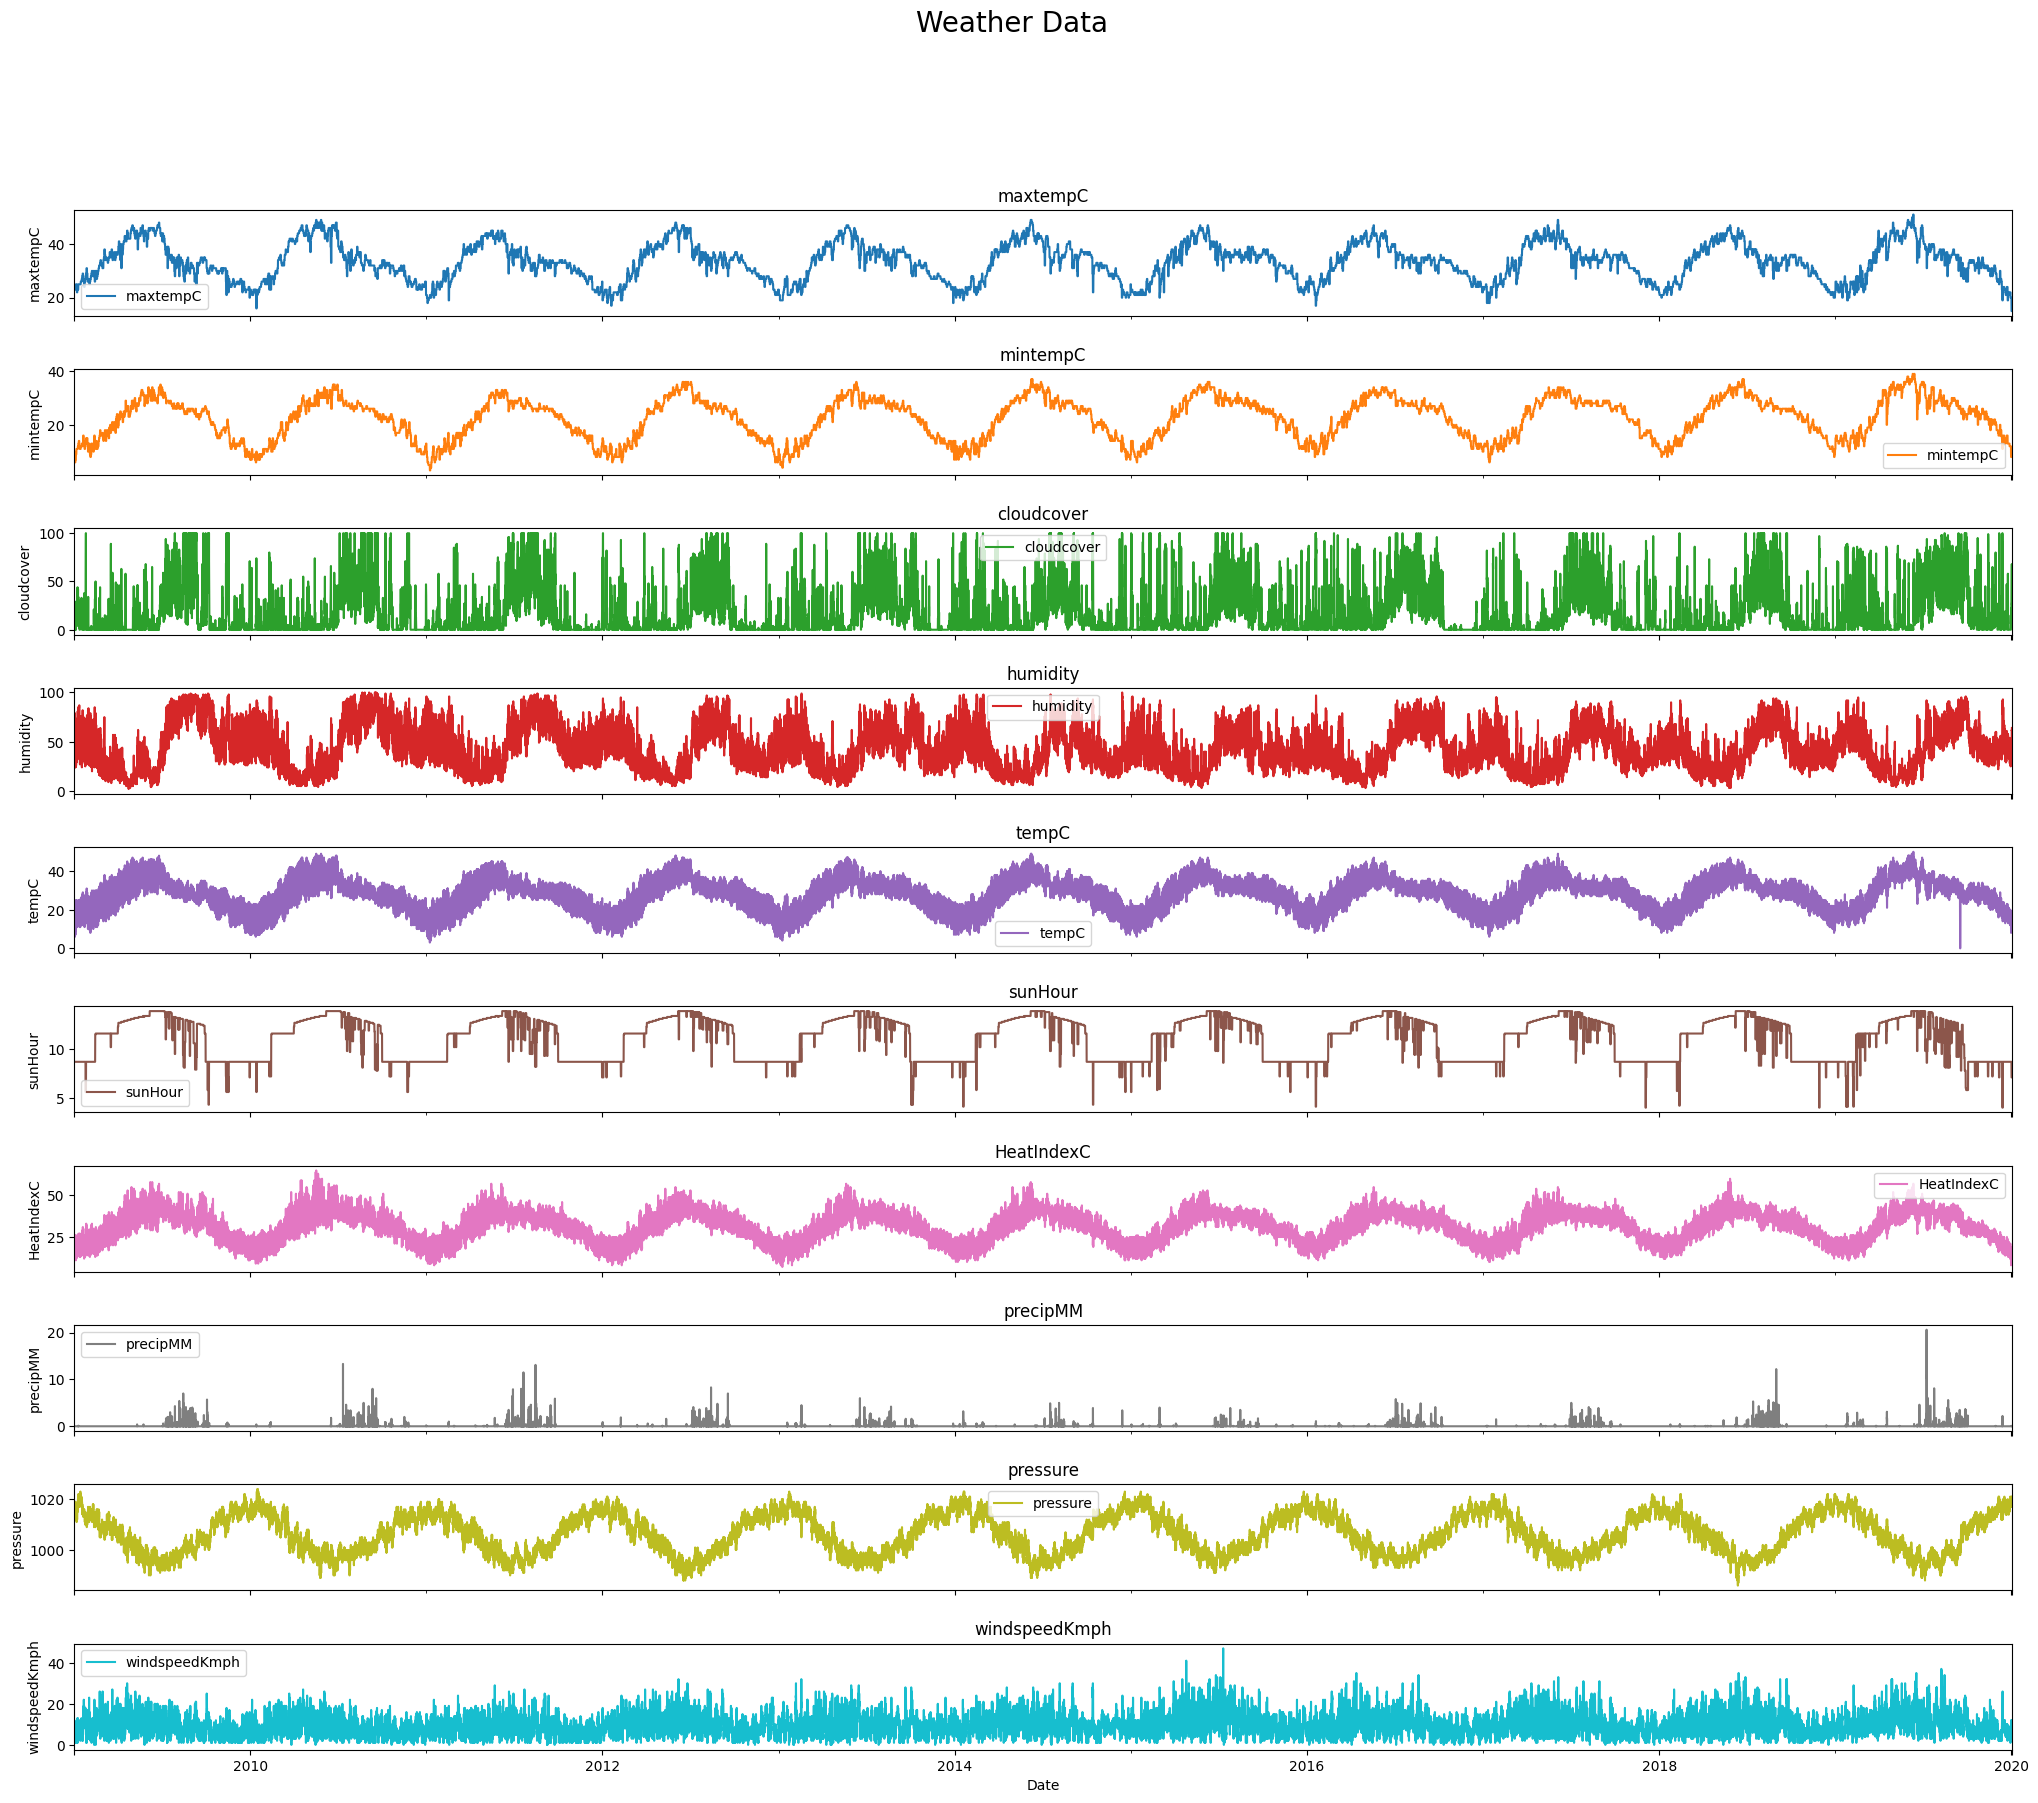

In [12]:
# This code plots a set of subplots, each representing a numerical column in the weather_df_num dataframe
# The subplots are displayed in a grid format, with the number of rows and columns determined automatically based on the number of columns in the dataframe
# The size of the plot is set to 25 inches by 20 inches using the figsize parameter

# plot the columns of the weather_df_num DataFrame
weather_df_num.plot(subplots=True, figsize=(25,20))

# set the title and axis labels for each subplot
plt.suptitle('Weather Data', fontsize=20)
plt.xlabel('Date')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for ax, col in zip(plt.gcf().axes, weather_df_num.columns):
    ax.set_title(col)
    ax.set_ylabel(col)
    
# show the plot
plt.show()


# Ploting all the column values for 1 year

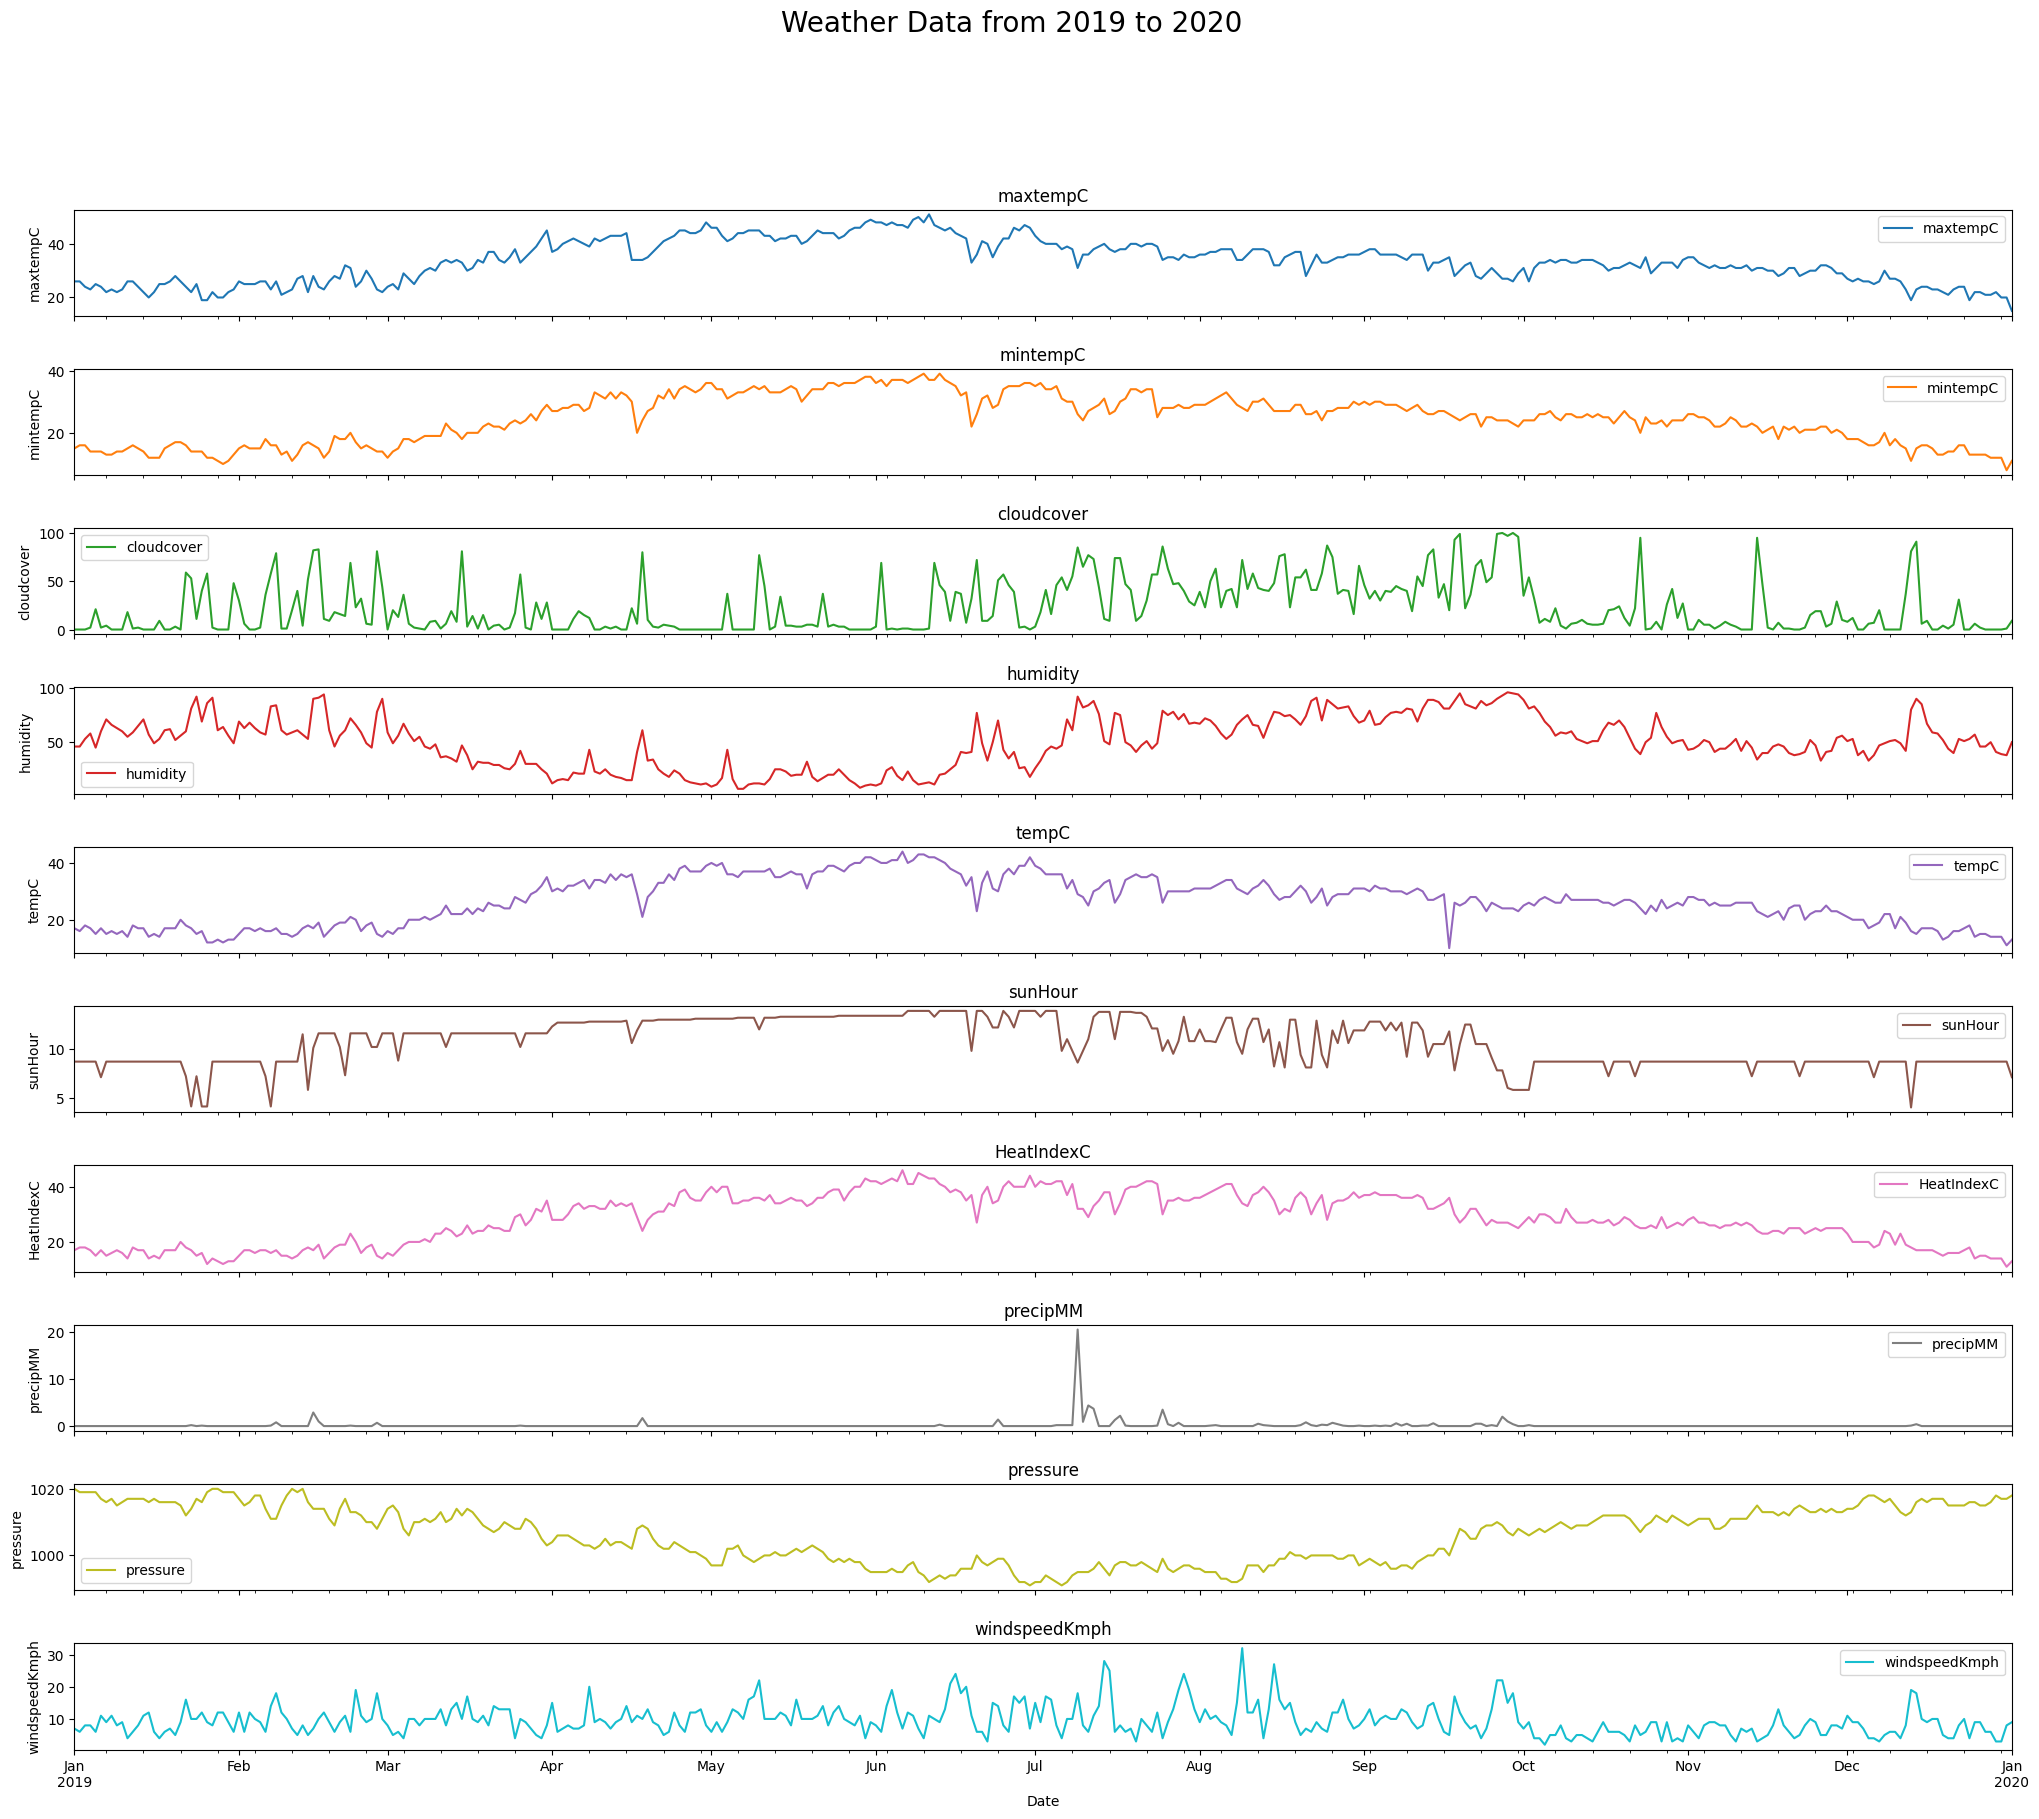

In [13]:
# This code filters the weather_df_num dataframe to include only the data from the year 2019 to 2020, using the slicing operator ':' to select a range of rows based on the index
# The resample method is then applied to the resulting dataframe with a frequency of 'D' (daily), which converts the data to a daily frequency
# The fillna method is then applied to forward fill any missing data in the dataframe
# Finally, a set of subplots is created to display each numerical column in the dataframe
# The subplots are displayed in a grid format, with the number of rows and columns determined automatically based on the number of columns in the dataframe
# The size of the plot is set to 25 inches by 20 inches using the figsize parameter

# plot the columns of the weather_df_num DataFrame for the years 2019-2020
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

# set the title and axis labels for each subplot
plt.suptitle('Weather Data from 2019 to 2020', fontsize=20)
plt.xlabel('Date')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for ax, col in zip(plt.gcf().axes, weather_df_num.columns):
    ax.set_title(col)
    ax.set_ylabel(col)

# show the plot
plt.show()


Text(0.5, 0.98, 'Frequency Histogram')

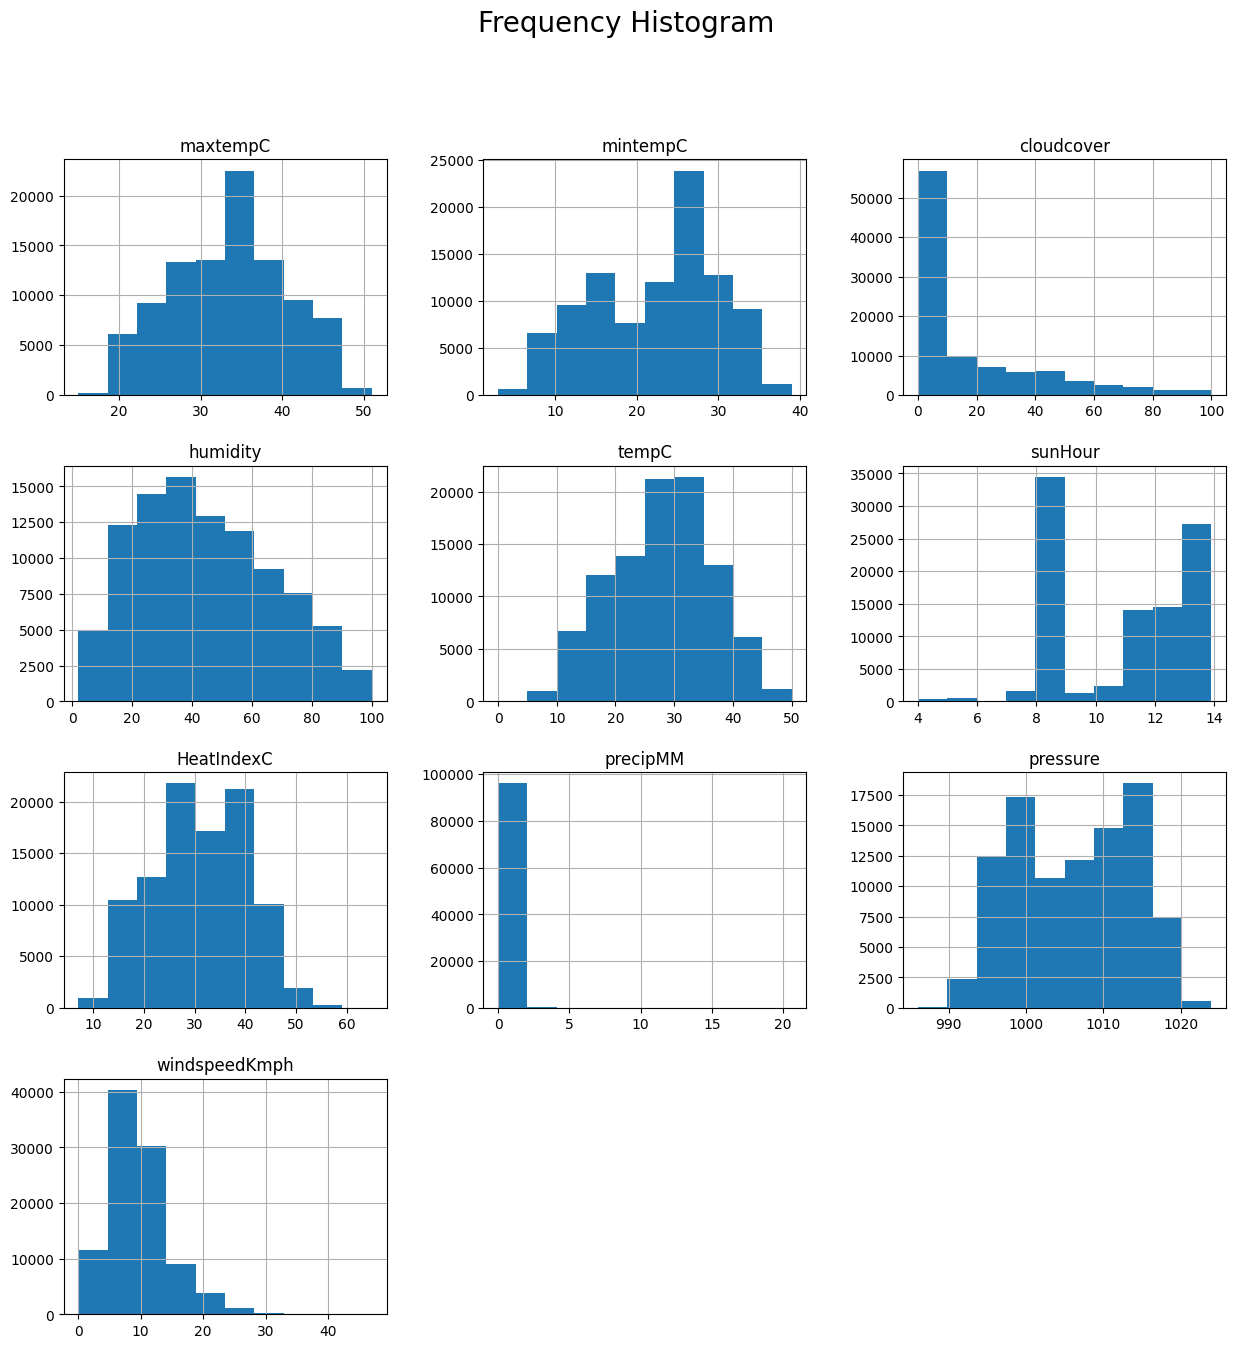

In [14]:
# This code creates a histogram of the numerical data in the weather_df_num dataframe
# The 'bins' parameter is set to 10, which means that the data is divided into 10 equally spaced bins
# The resulting histogram is displayed in a square-shaped plot with dimensions of 15 inches by 15 inches
# This code assumes that `weather_df_num` is a Pandas dataframe containing only numerical columns. If `weather_df_num` contains non-numerical columns, this code may not work as expected.

weather_df_num.hist(bins=10, figsize=(15,15))

plt.suptitle('Frequency Histogram', fontsize=20)

In [15]:
# This code filters the weather_df_num dataframe to include only the data from the year 2019 to 2020, using the slicing operator ':' to select a range of rows based on the index
# The resulting subset of the dataframe is assigned to a new variable called 'weth'
# The head() method is then called on 'weth', which displays the first 5 rows of the subset

weth = weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,8.7,17,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,8.7,17,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,8.7,16,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,8.7,16,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,8.7,16,0.0,1019,6


In [16]:
# This code creates two new variables 'weather_x' and 'weather_y' based on the weather_df_num dataframe
# The 'pop' method is used to remove the 'tempC' column from the original dataframe and assign it to the 'weather_y' variable
# The 'weather_x' variable is assigned the remaining columns of the original dataframe

weather_y = weather_df_num.pop("tempC")
weather_x = weather_df_num

# The resulting weather_x dataframe can be used as input to a machine learning algorithm, while the weather_y series can be used as the target variable to train the algorithm to predict temperature.

### Now our dataset is prepared and it is ready to be fed to the model for training, it’s time to split the dataset into training and testing.

In [17]:
# This code uses the train_test_split function from the scikit-learn library to split
# the weather_x and weather_y datasets into training and testing sets.
# The test_size parameter specifies the percentage of the data that should be used for testing,
# in this case 20%.
# The random_state parameter ensures that the data is split in a reproducible way,
# so that the same random seed is used each time the code is run.
train_X, test_X, train_y, test_y = train_test_split(weather_x, weather_y, test_size=0.2, random_state=4)

In [18]:
train_X.shape

(77145, 9)

In [19]:
train_y.shape

(77145,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. In supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [20]:
train_y.head()

date_time
2012-03-13 07:00:00    22
2009-11-05 21:00:00    21
2017-10-11 22:00:00    30
2019-06-08 11:00:00    47
2019-03-06 05:00:00    18
Name: tempC, dtype: int64

# Multiple Linear Regression

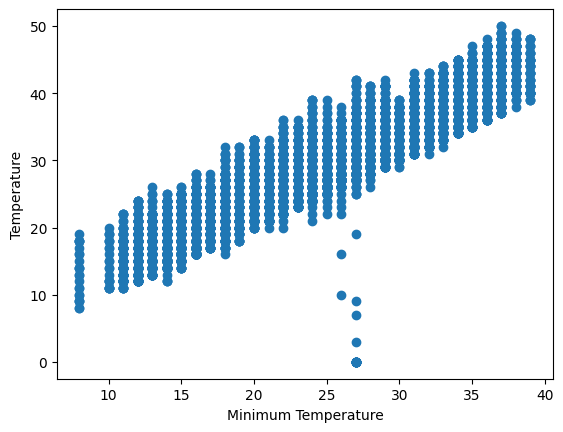

In [21]:
# This code uses the scatter plot function from the matplotlib library to create a scatter plot
# of the minimum temperature (x-axis) versus the temperature (y-axis) using the weth dataset.
plt.scatter(weth.mintempC, weth.tempC)

# This code adds an x-axis label to the plot.
plt.xlabel("Minimum Temperature")

# This code adds a y-axis label to the plot.
plt.ylabel("Temperature")

# This code displays the plot.
plt.show()

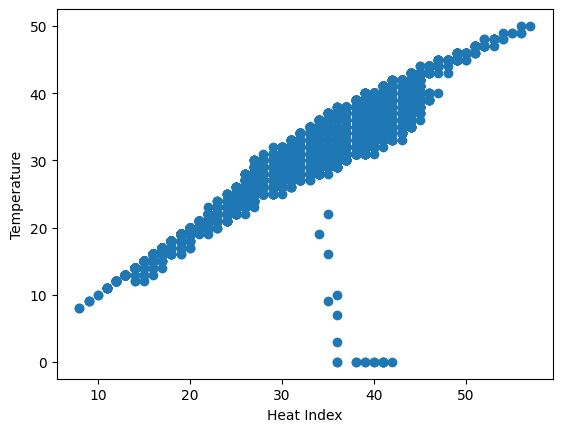

In [22]:
# This code uses the scatter plot function from the matplotlib library to create a scatter plot
# of the Heat Index (x-axis) versus the temperature (y-axis) using the weth dataset.
plt.scatter(weth.HeatIndexC, weth.tempC)

# This code adds an x-axis label to the plot.
plt.xlabel("Heat Index")

# This code adds a y-axis label to the plot.
plt.ylabel("Temperature")

# This code displays the plot.
plt.show()

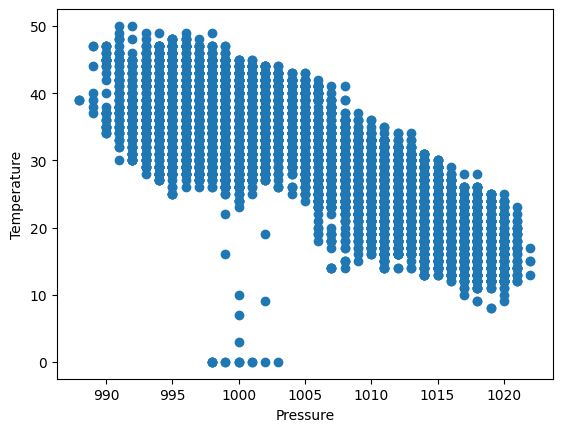

In [23]:
# This code uses the scatter plot function from the matplotlib library to create a scatter plot
# of the pressure (x-axis) versus the temperature (y-axis) using the weth dataset.
plt.scatter(weth.pressure, weth.tempC)

# This code adds an x-axis label to the plot.
plt.xlabel("Pressure")

# This code adds a y-axis label to the plot.
plt.ylabel("Temperature")

# This code displays the plot.
plt.show()

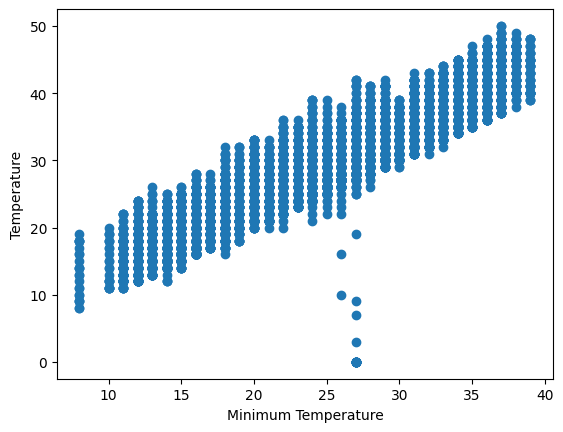

In [24]:
# This code uses the scatter plot function from the matplotlib library to create a scatter plot
# of the minimum temperature (x-axis) versus the temperature (y-axis) using the weth dataset.
plt.scatter(weth.mintempC, weth.tempC)

# This code adds an x-axis label to the plot.
plt.xlabel("Minimum Temperature")

# This code adds a y-axis label to the plot.
plt.ylabel("Temperature")

# This code displays the plot.
plt.show()

In [25]:
# This code creates a new instance of a LinearRegression model using scikit-learn's LinearRegression class.
model = LinearRegression()

# This code trains the model using the fit() method, which takes the training input data train_X
# and the corresponding training output data train_y as arguments.
# The model then learns the relationship between the input and output data and is ready to make predictions.
model.fit(train_X, train_y)

LinearRegression()

In [26]:
# This code uses the predict() method of the trained model to make predictions on the test_X dataset.
# The model takes the test_X input data as input and generates predicted values for the output variable.
prediction = model.predict(test_X)

In [27]:
#calculating error
np.mean(np.absolute(prediction-test_y))

1.20047357940968

In [28]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.96


In [29]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
linear_df = pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})
linear_df

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.89,-0.89
2015-11-04 20:00:00,25,24.57,0.43
2015-09-21 09:00:00,34,35.08,-1.08
2017-02-16 11:00:00,28,25.22,2.78
2012-07-21 01:00:00,28,28.04,-0.04
...,...,...,...
2019-03-30 09:00:00,37,33.55,3.45
2015-11-12 12:00:00,32,30.36,1.64
2019-12-31 05:00:00,8,9.13,-1.13


Text(0.5, 0.98, 'Comparision of Predicted temp by Linear regression and Actual Temp')

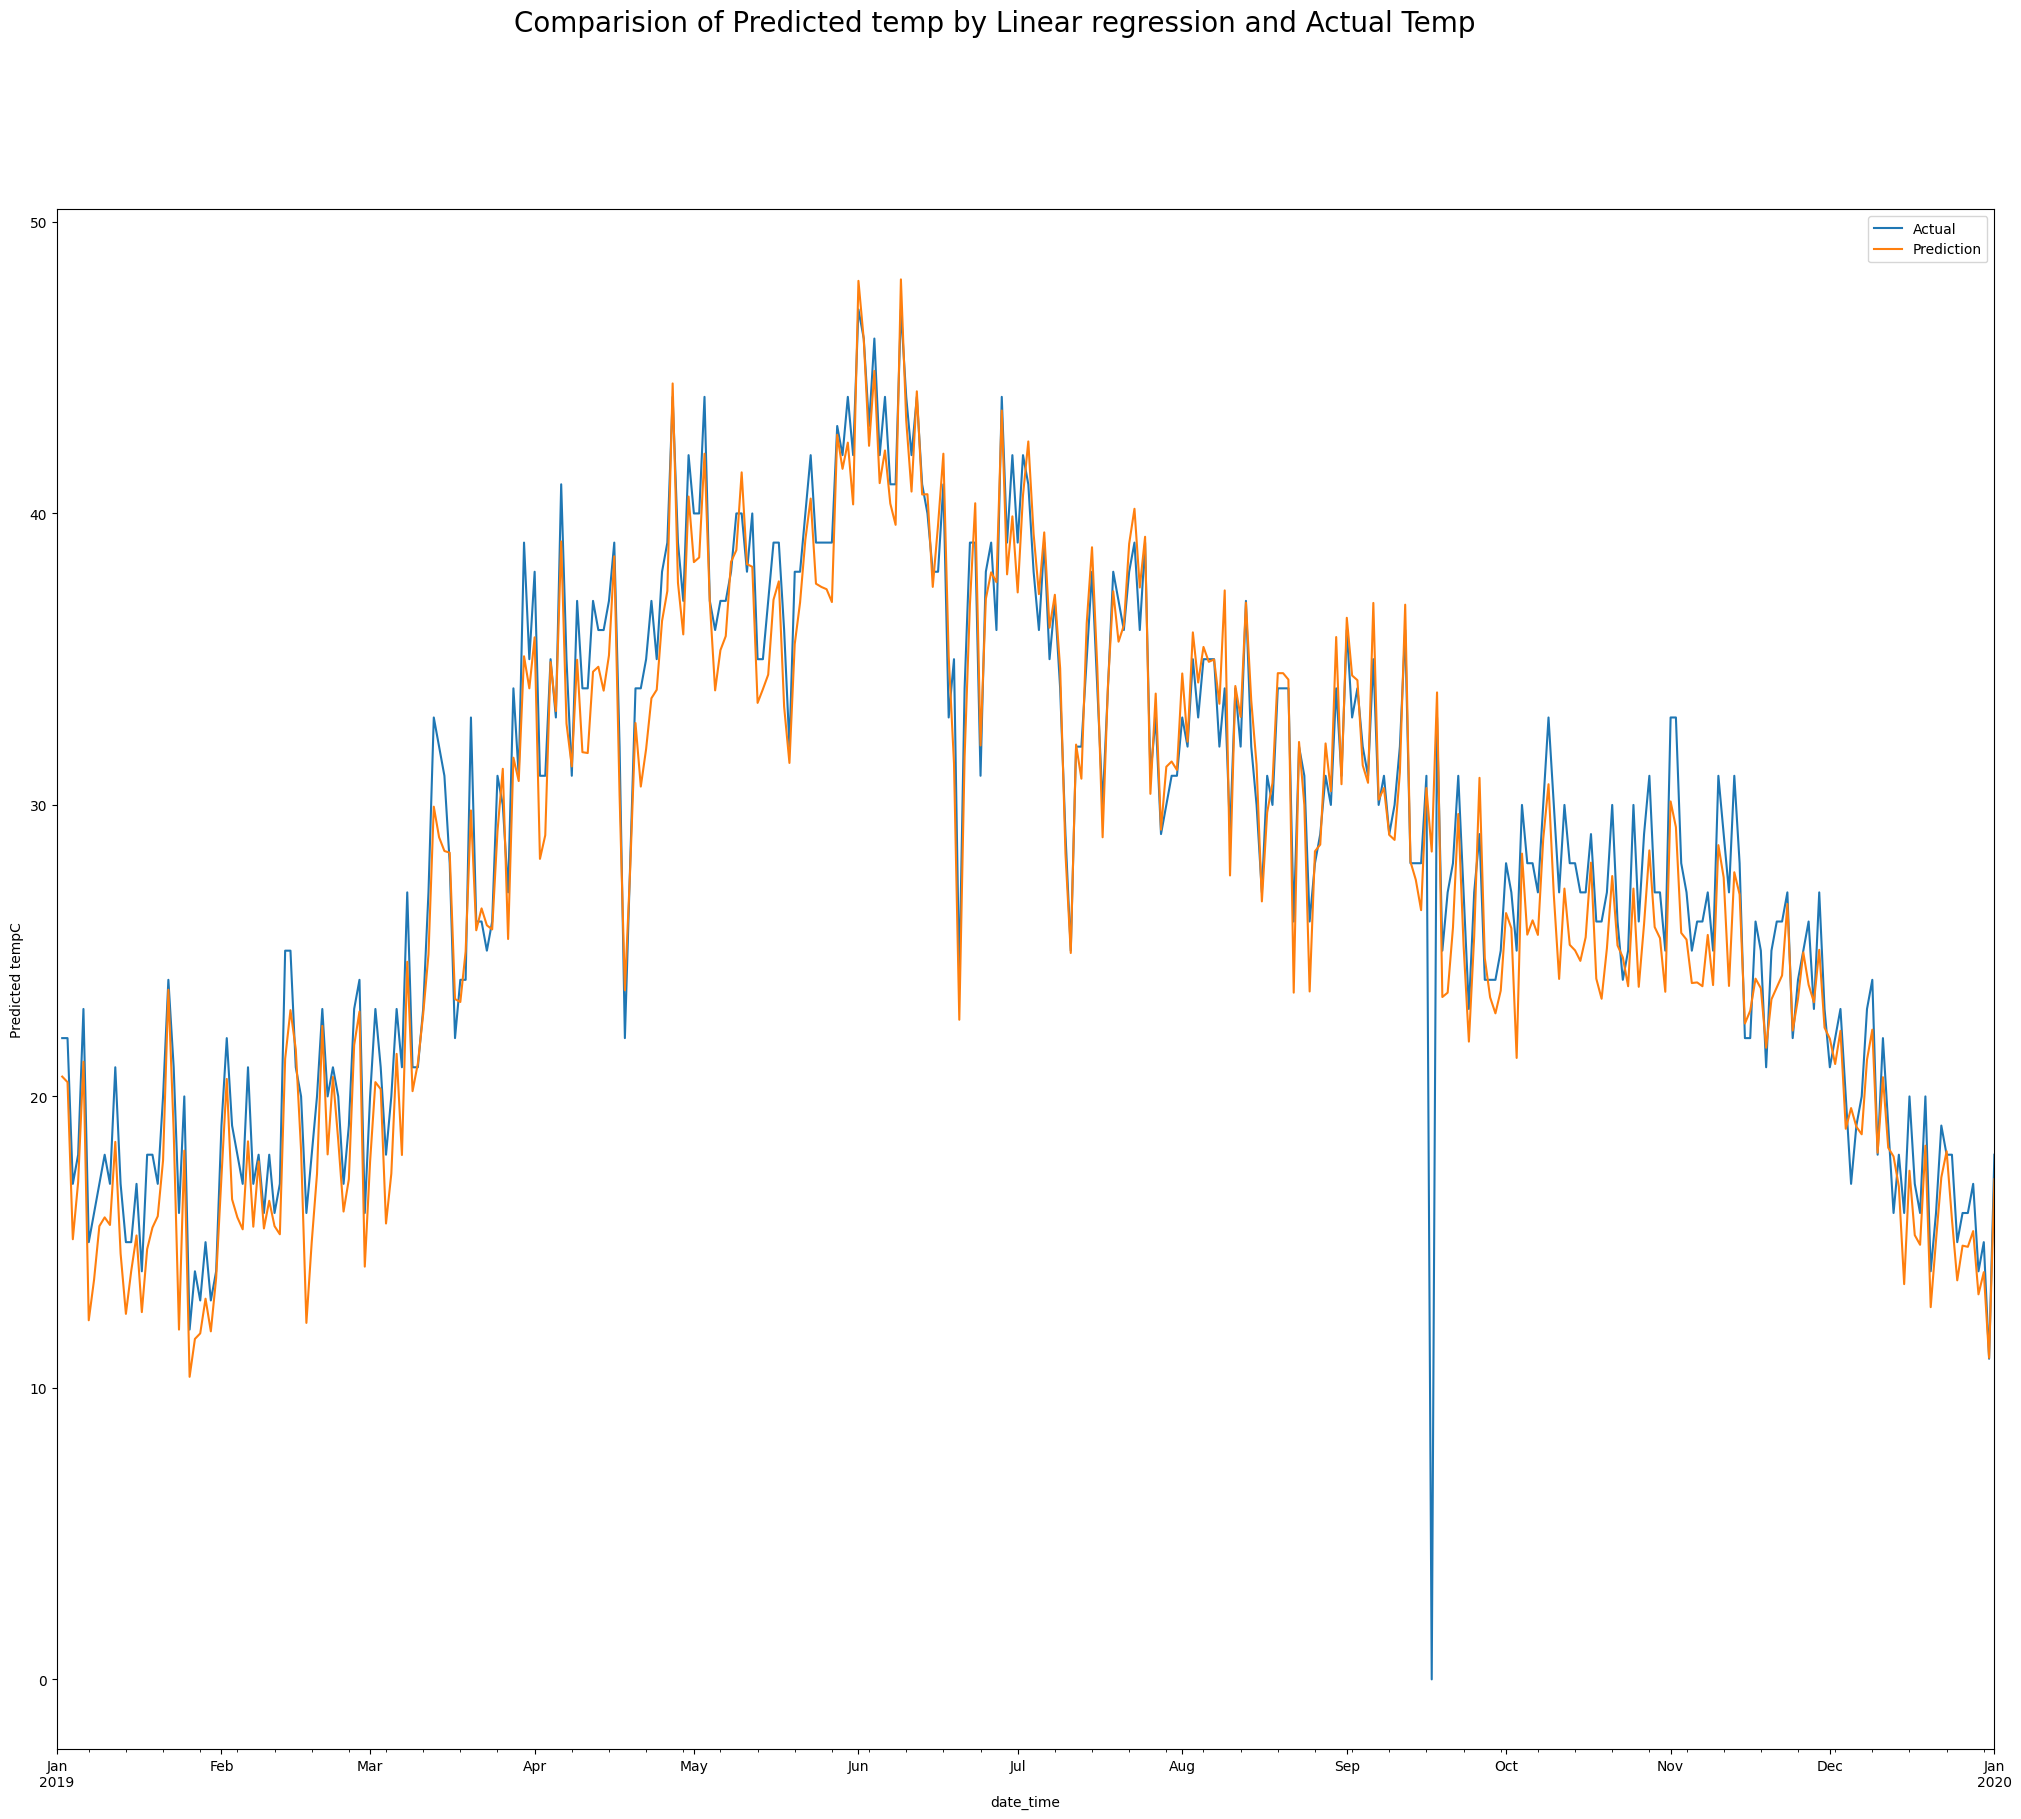

In [55]:
# linear_df[['Actual', 'Prediction']].plot(figsize=(25,20))
linear_df['2019':'2020'].resample('D').fillna(method='pad')[['Actual', 'Prediction']].plot(figsize=(25,20))
plt.ylabel('Predicted tempC')
plt.suptitle('Comparision of Predicted temp by Linear regression and Actual Temp', fontsize=20)

# Decision Tree Regression 

In [56]:
# This code imports the DecisionTreeRegressor class from the sklearn.tree module.
from sklearn.tree import DecisionTreeRegressor

# This code creates a new instance of the DecisionTreeRegressor model using the DecisionTreeRegressor class.
# The random_state parameter sets the random seed for reproducibility.
regressor = DecisionTreeRegressor(random_state=0)

# This code trains the model using the fit() method, which takes the training input data train_X
# and the corresponding training output data train_y as arguments.
# The model then learns the relationship between the input and output data and is ready to make predictions.
regressor.fit(train_X, train_y)


DecisionTreeRegressor(random_state=0)

In [57]:
# This code uses the predict() method of the DecisionTreeRegressor model to make predictions on the test_X dataset.
# The model takes the test_X input data as input and generates predicted values for the output variable.
prediction2 = regressor.predict(test_X)

# This code calculates the mean absolute error (MAE) between the predicted values and the actual values for the test set.
# The absolute() function is used to calculate the absolute difference between the predicted and actual values,
# and the mean() function is used to calculate the mean of these absolute differences.
# The np.mean() function is used to calculate the overall mean of the absolute differences.
mae = np.mean(np.absolute(prediction2 - test_y))

In [58]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


In [59]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
decisionTree_df = pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})
decisionTree_df

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.0,0.0
2015-11-04 20:00:00,25,24.0,1.0
2015-09-21 09:00:00,34,34.0,0.0
2017-02-16 11:00:00,28,27.0,1.0
2012-07-21 01:00:00,28,28.0,0.0
...,...,...,...
2019-03-30 09:00:00,37,32.0,5.0
2015-11-12 12:00:00,32,32.0,0.0
2019-12-31 05:00:00,8,9.0,-1.0


Text(0.5, 0.98, 'Comparision of Predicted temp by Decision Tree Regression and Actual temp')

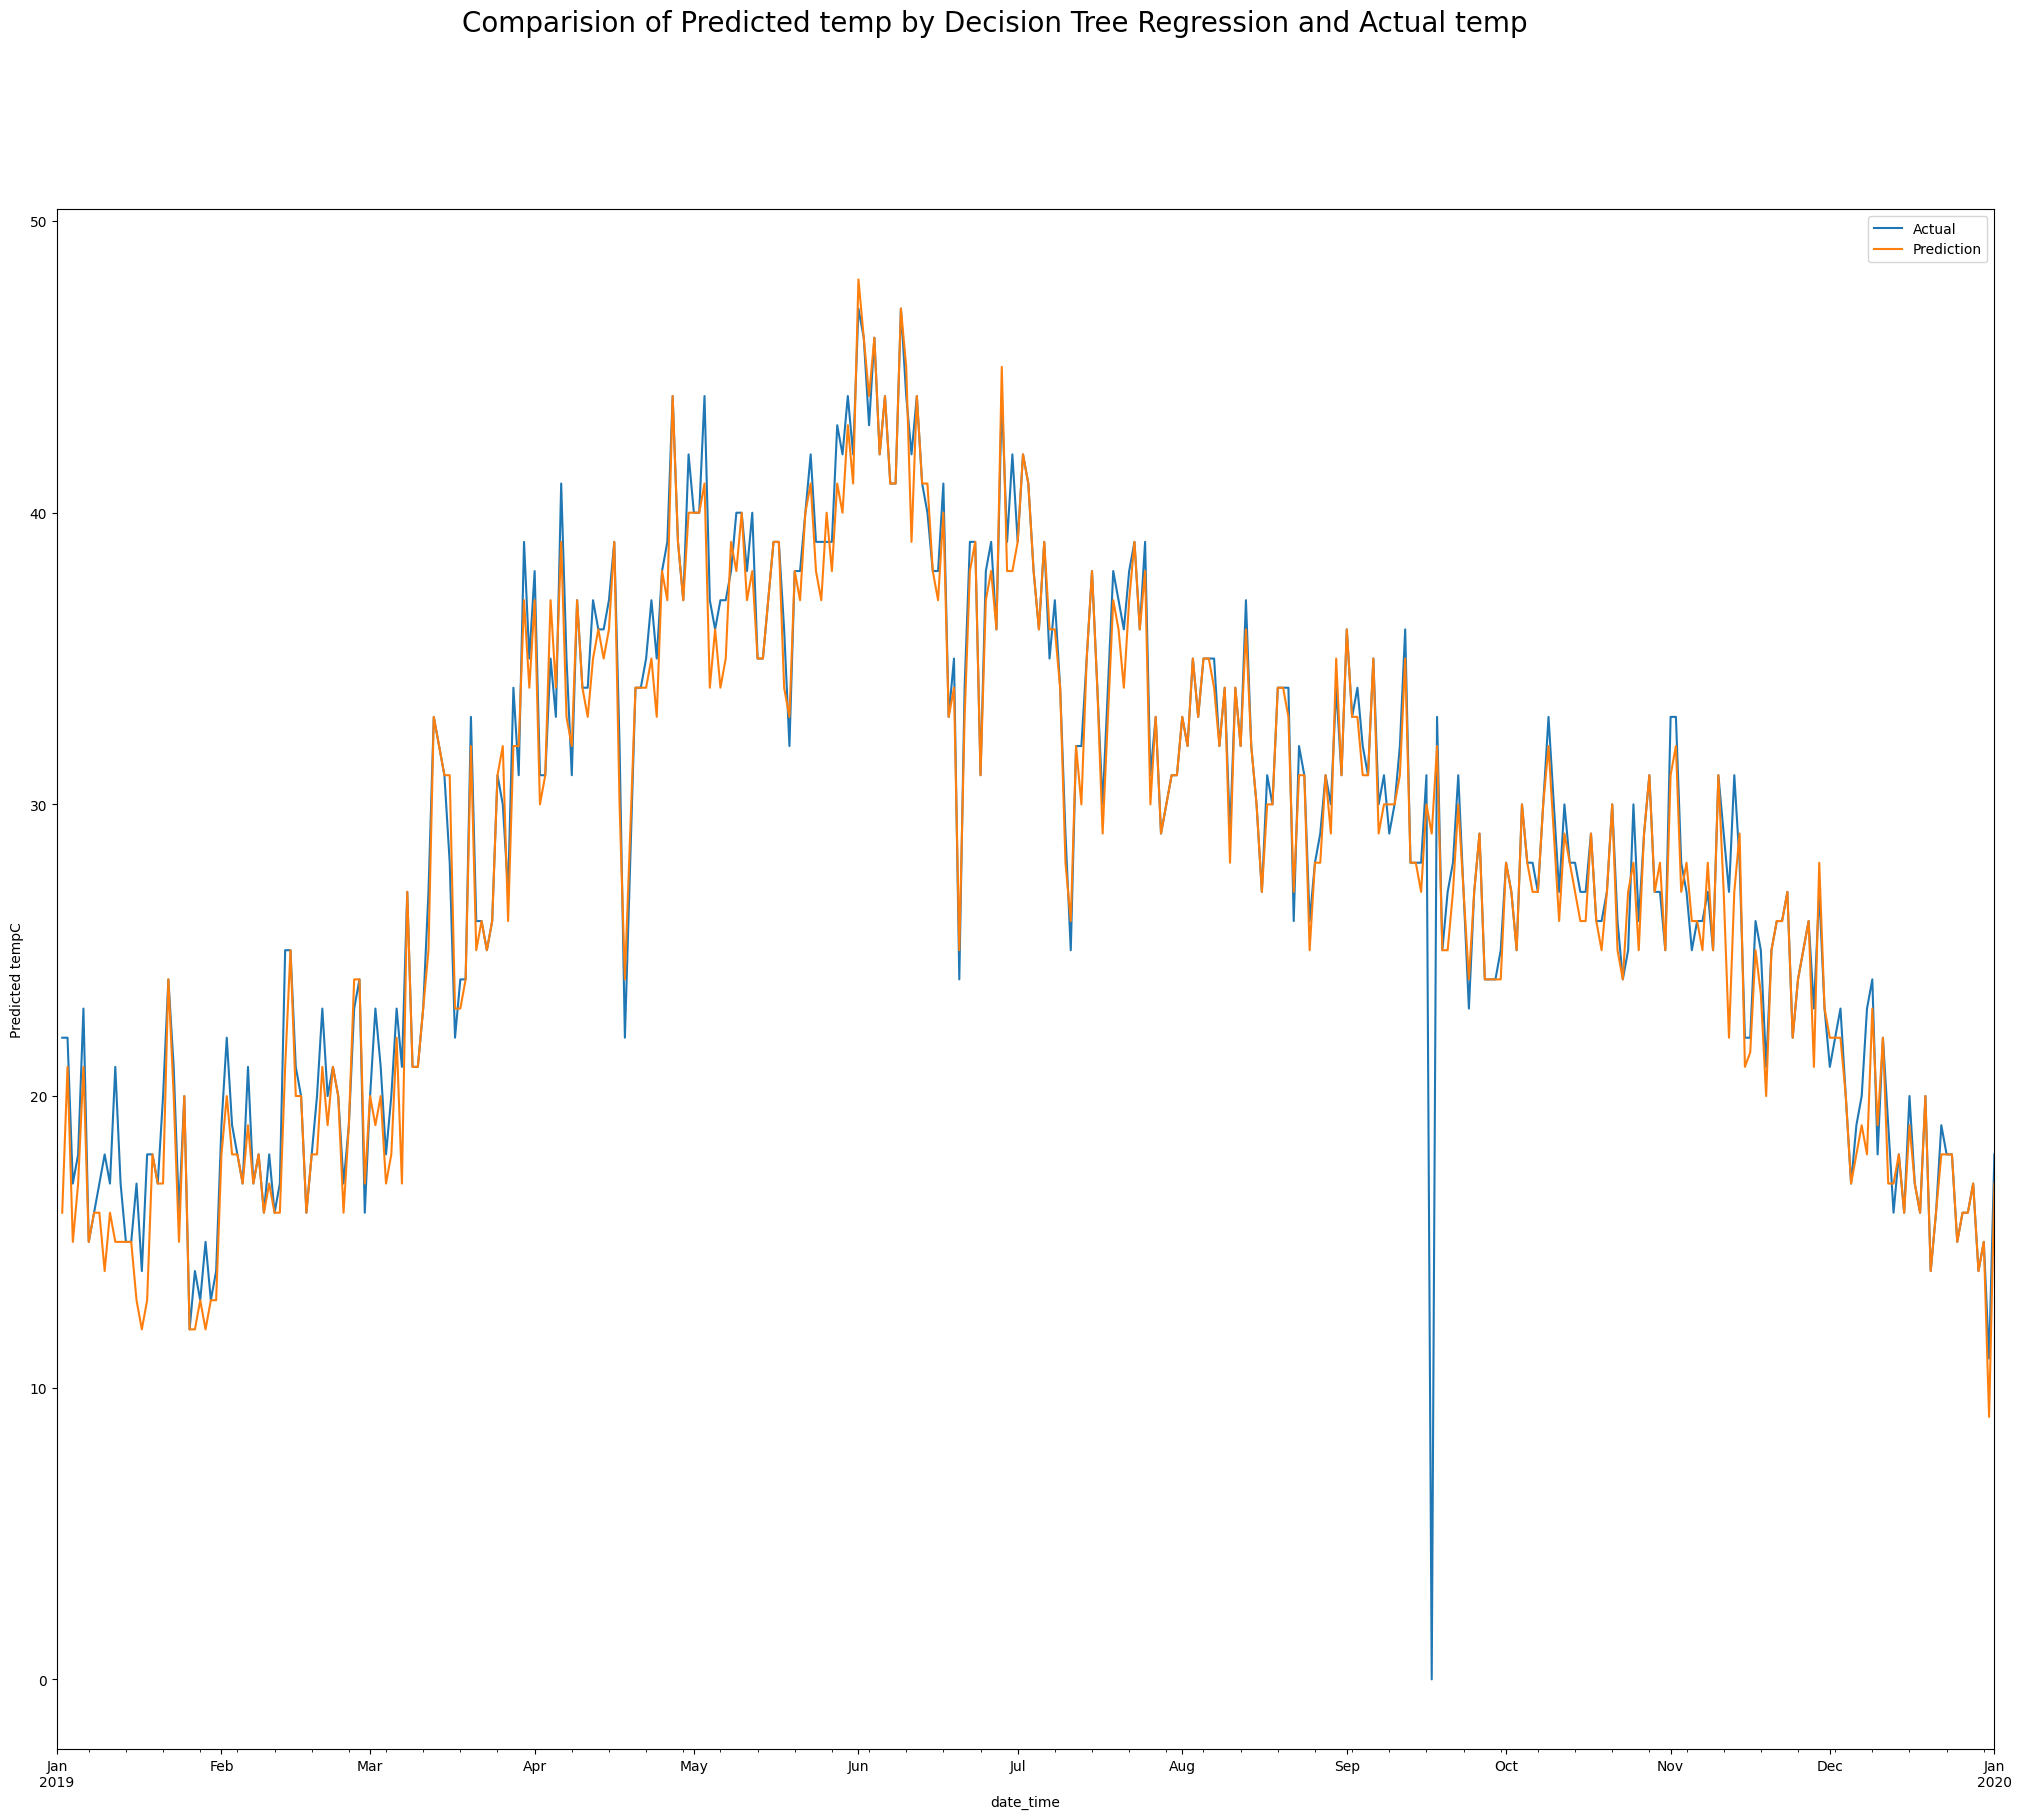

In [60]:
decisionTree_df['2019':'2020'].resample('D').fillna(method='pad')[['Actual', 'Prediction']].plot(figsize=(25,20))
plt.ylabel('Predicted tempC')
plt.suptitle('Comparision of Predicted temp by Decision Tree Regression and Actual temp', fontsize=20)

# Random Forest Regression

In [61]:
# This code imports the RandomForestRegressor class from the sklearn.ensemble module.
from sklearn.ensemble import RandomForestRegressor

# This code creates a new instance of the RandomForestRegressor model using the RandomForestRegressor class.
# The max_depth parameter sets the maximum depth of each decision tree in the forest to 90.
# The random_state parameter sets the random seed for reproducibility.
# The n_estimators parameter sets the number of decision trees in the forest to 100.
regr = RandomForestRegressor(max_depth=90, random_state=0, n_estimators=100)

# This code trains the model using the fit() method, which takes the training input data train_X
# and the corresponding training output data train_y as arguments.
# The model then learns the relationship between the input and output data and is ready to make predictions.
regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [62]:
# This code uses the predict() method of the RandomForestRegressor model to make predictions on the test_X dataset.
# The model takes the test_X input data as input and generates predicted values for the output variable.
prediction3 = regr.predict(test_X)

# This code calculates the mean absolute error (MAE) between the predicted values and the actual values for the test set.
# The absolute() function is used to calculate the absolute difference between the predicted and actual values,
# and the mean() function is used to calculate the mean of these absolute differences.
# The np.mean() function is used to calculate the overall mean of the absolute differences.
mae = np.mean(np.absolute(prediction3 - test_y))

In [63]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [64]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
randomForest_df = pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})
randomForest_df

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,33.92,0.08
2015-11-04 20:00:00,25,24.84,0.16
2015-09-21 09:00:00,34,34.25,-0.25
2017-02-16 11:00:00,28,27.00,1.00
2012-07-21 01:00:00,28,27.99,0.01
...,...,...,...
2019-03-30 09:00:00,37,32.79,4.21
2015-11-12 12:00:00,32,31.91,0.09
2019-12-31 05:00:00,8,8.81,-0.81


Text(0.5, 0.98, 'Comparision of Predicted temp by Random Forest Regression and Actual temp')

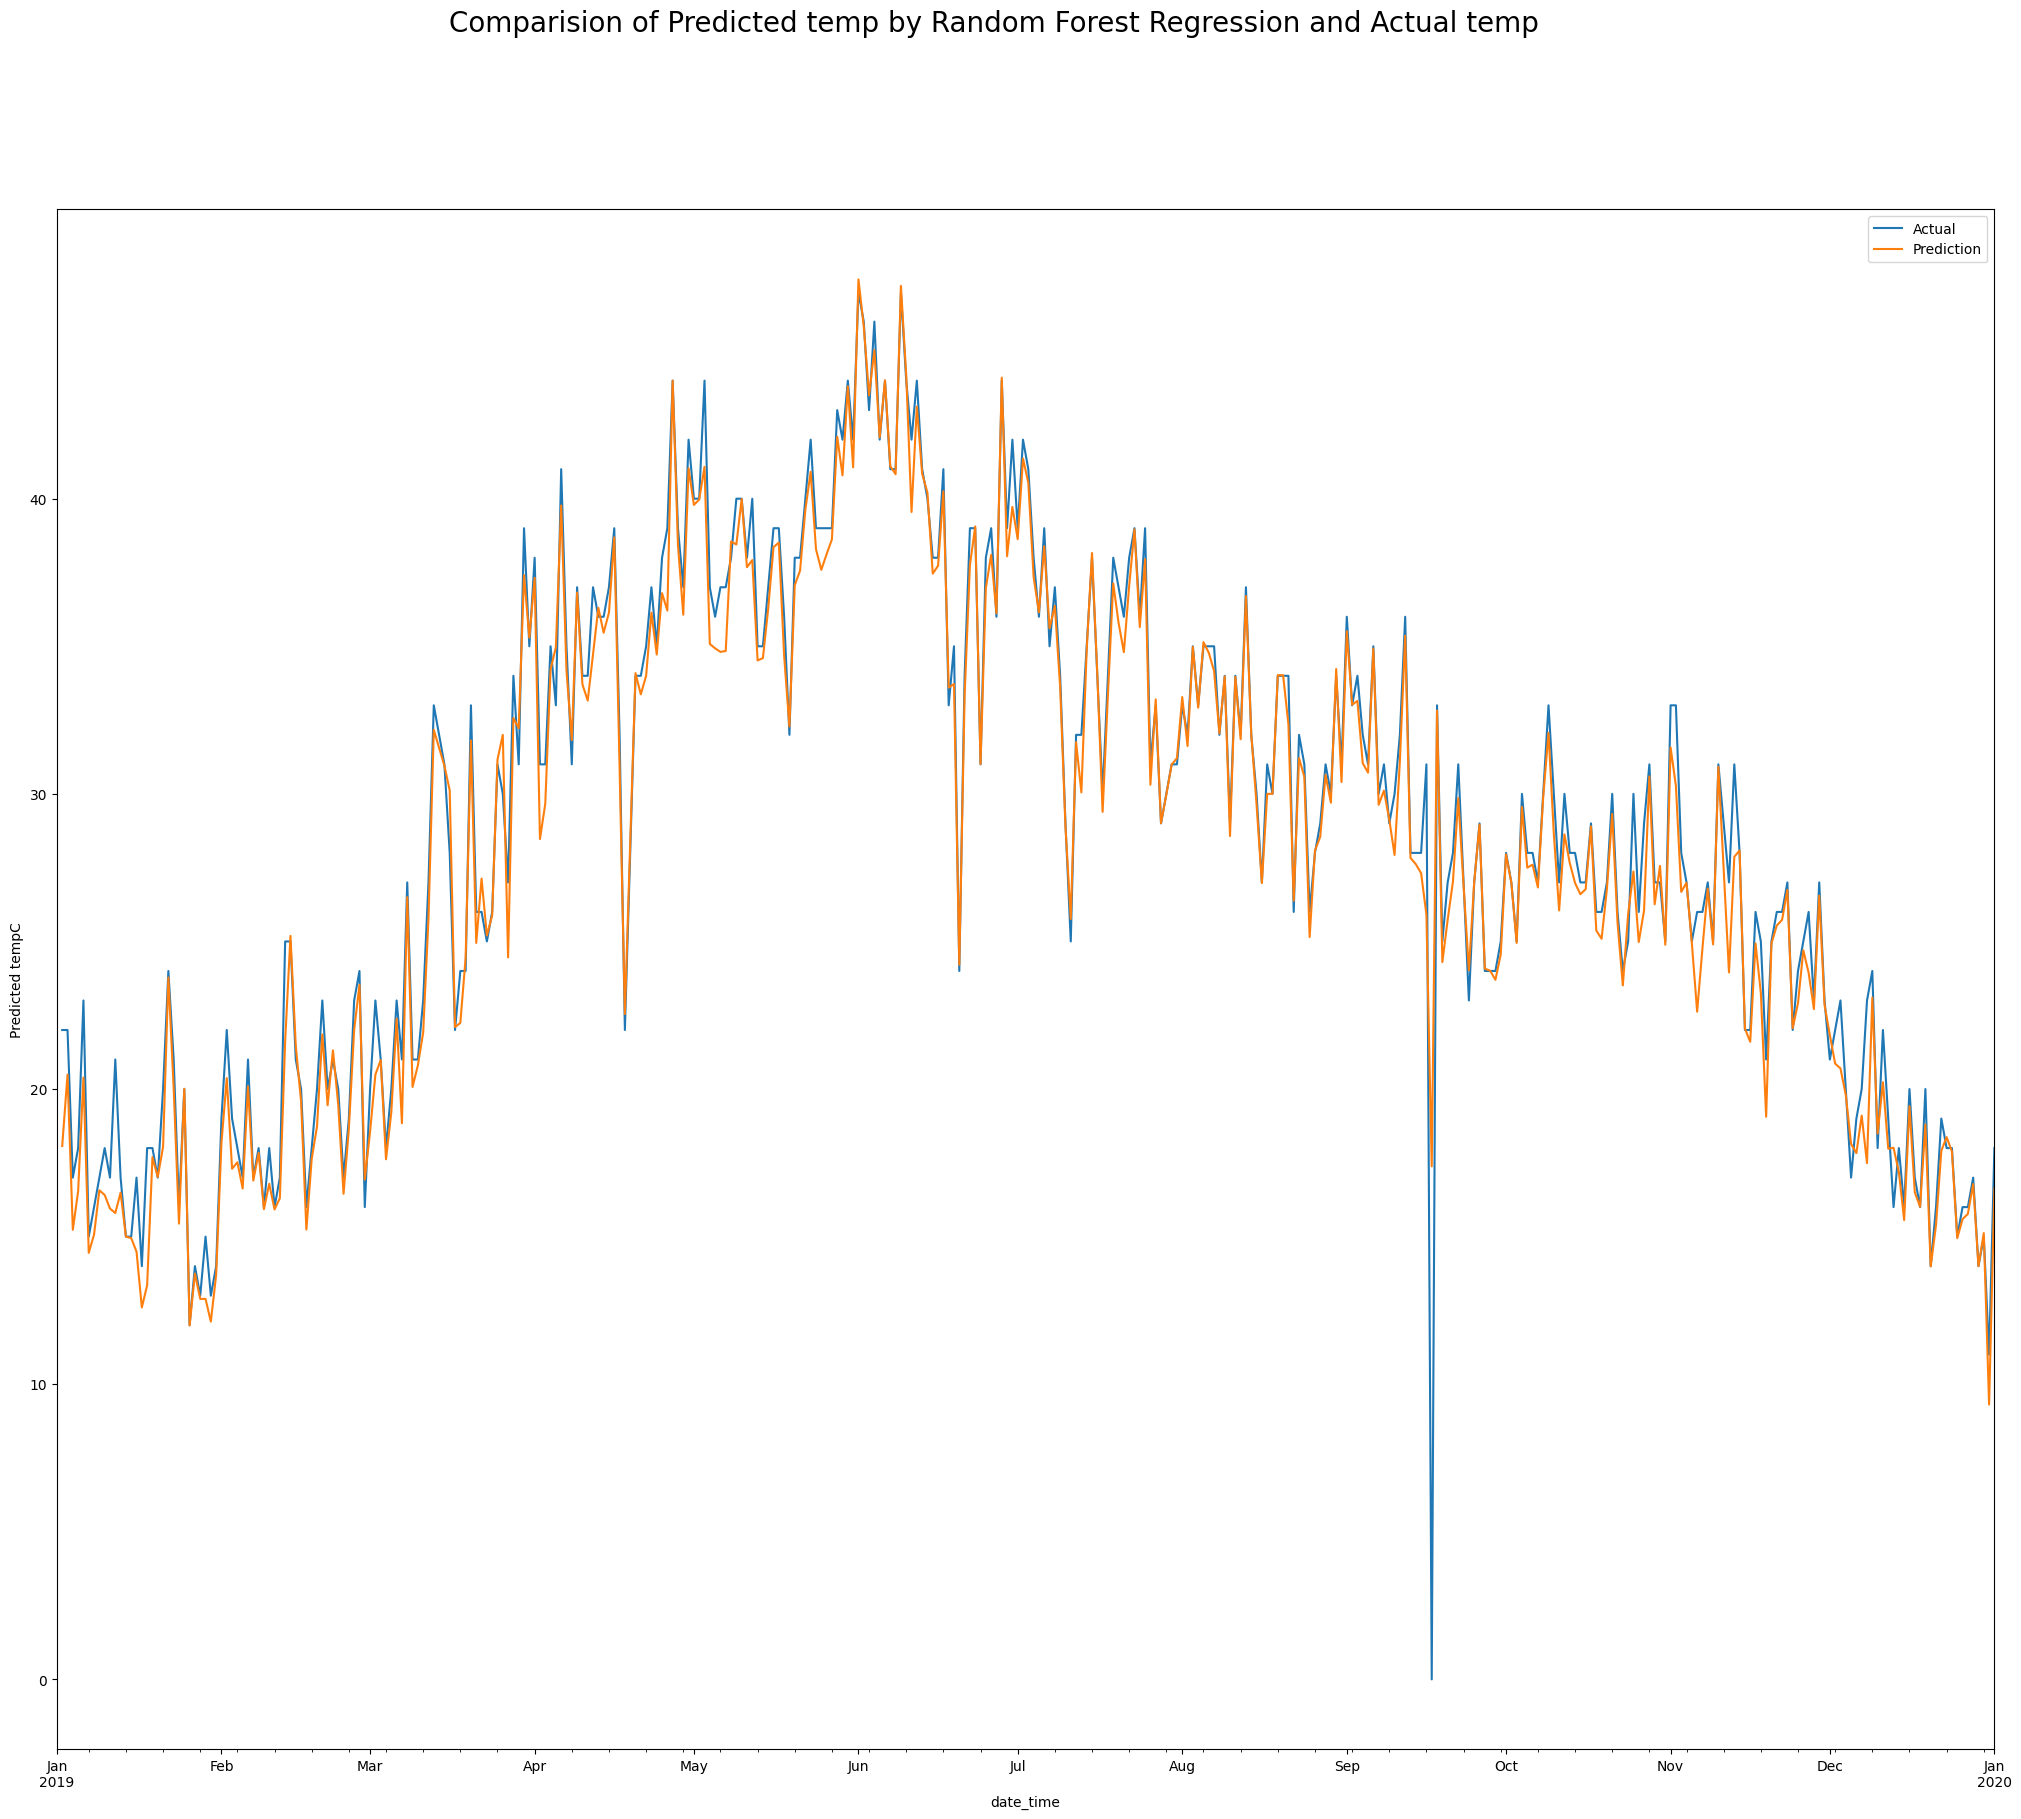

In [50]:
randomForest_df['2019':'2020'].resample('D').fillna(method='pad')[['Actual', 'Prediction']].plot(figsize=(25,20))
plt.ylabel('Predicted tempC')
plt.suptitle('Comparision of Predicted temp by Random Forest Regression and Actual temp', fontsize=20)

# Comparision of the difference between Actual and Predicted tempC values predicted by Linear regression, Random Forest Regression and Decision Tree Regression

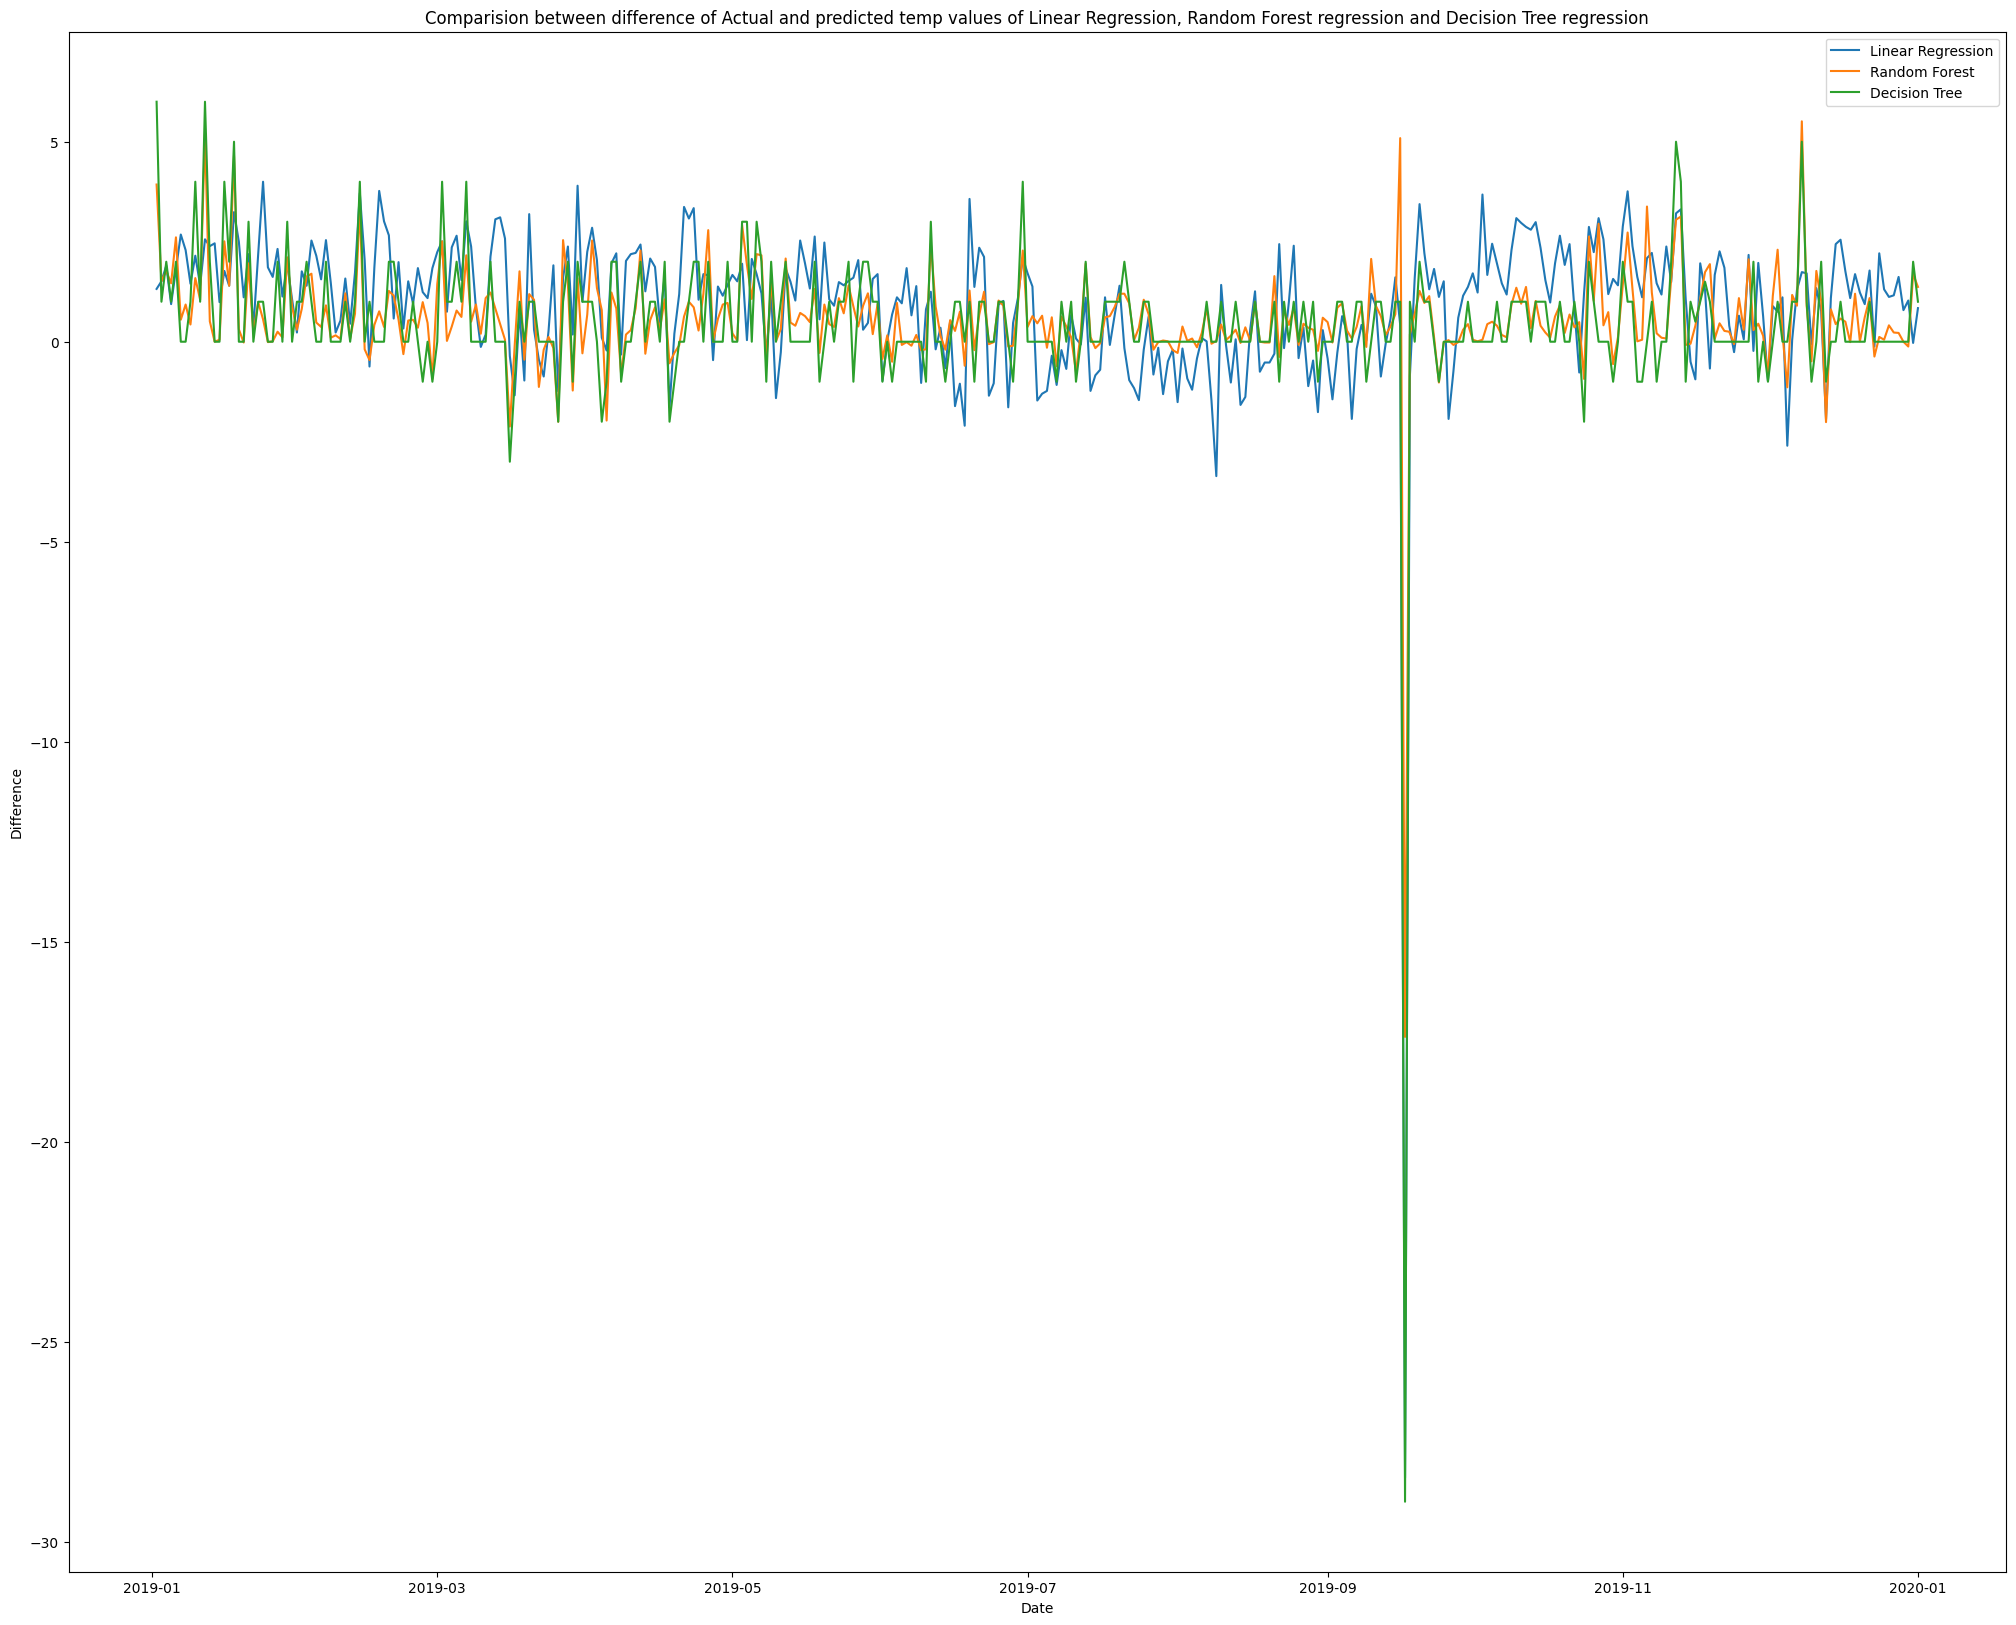

In [70]:
import matplotlib.pyplot as plt

# plot all three DataFrames in one plot
plt.figure(figsize=(25,20))
plt.plot(linear_df['2019':'2020'].resample('D').fillna(method='pad')['diff'], label='Linear Regression')
plt.plot(randomForest_df['2019':'2020'].resample('D').fillna(method='pad')['diff'], label='Random Forest')
plt.plot(decisionTree_df['2019':'2020'].resample('D').fillna(method='pad')['diff'], label='Decision Tree')

# set the title of the plot
plt.title('Comparision between difference of Actual and predicted temp values of Linear Regression, Random Forest regression and Decision Tree regression')

# set the x-axis label
plt.xlabel('Date')

# set the y-axis label
plt.ylabel('Difference')

# show the legend
plt.legend()

# show the plot
plt.show()

In [71]:
# This code imports the r2_score function from the sklearn.metrics module.
# The r2_score function is used to calculate the R-squared (coefficient of determination) value, which measures the proportion of variance in the output variable that can be explained by the input variables.
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [72]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 1.20
Residual sum of squares (MSE): 2.51
R2-score: 0.96


# Calculating R2-score for Decision Tree Regression

In [73]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.56
Residual sum of squares (MSE): 1.12
R2-score: 0.98


# Calculating R2-score for Random Forest Regression

In [74]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.47
Residual sum of squares (MSE): 0.63
R2-score: 0.99
